# これからの強化学習
## 1.3.3. Sarsa
* 参考：[強化学習 – Python3でSarsaを使って行動価値を出す](https://endoyuta.com/2017/02/07/%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92-python3%E3%81%A7sarsa%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6%E8%A1%8C%E5%8B%95%E4%BE%A1%E5%80%A4%E3%82%92%E5%87%BA%E3%81%99/)
* 上記を元に、一部修正させていただきました。ありがとうございます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

S = np.arange(4)
A = np.arange(2)

# 報酬。ある状態においてa_1の報酬、a_2の報酬
R = np.array([[0, 1], [-1, 1], [5, -100], [0, 0]])

# ある状態で、ある行動をとったら次の状態はSのどれか。
# S_1(0)でa_1の行動をとったら次は2にいるよ。
S1 = np.array([[2, 1], [0, 3], [3, 0], [None, None]])

a1_per = 0.5

# 学習率
alpha = 0.01

# 割引率
gamma = 0.8

epi = 30000

# Q関数の初期値
# q_init = 10
q_init = 10

Q = np.zeros(R.shape)

# 元のコードでは、S_4でa_1,a_2することの行動価値関数の初期値に
# 10を入れていたが、0にすべきと考えそう変更した。
# S_4ではもう行動できないため、期待値は0だと考えた。
Q[:3] += q_init

In [2]:
# ある状態である行動をとった際の行動価値の値
Q

array([[ 10.,  10.],
       [ 10.,  10.],
       [ 10.,  10.],
       [  0.,   0.]])

In [3]:
# 方策。ある確率でa_1の行動をとる。
# 0~1のランダムな数字を出して、
# a1_per以下なら0を返す。(a_0の行動)
# a1_perより大きければ1を返す。(a_1の行動)
def pi(a1_per):
    if random.random() <= a1_per: return 0
    return 1

# Qの状態・行動について
# 全て、一回ずつ更新する。
# しかし、移動先がS_4であるような状態・行動の場合は更新しない
def sarsa():
    for s in S:
        for a in A:
            if S1[s][a] == None:
                continue
            TD = R[s][a] + gamma * Q[S1[s][a], pi(a1_per)] - Q[s][a]
            Q[s][a] += alpha * TD

In [4]:
result_q = []

# epi回数繰り返す。
for step in range(epi):
    sarsa()
    # グラフ描画用に
    if (step + 1) % 10 == 0:
        result_q.append(Q.tolist())

In [5]:
# result_qはstep数/10,状態数,行動数
np.array(result_q).shape

(3000, 4, 2)

In [6]:
result_q = np.array(result_q).transpose([1, 2, 0])


In [7]:
# 状態数,行動数,step数/10に変更
np.array(result_q).shape

(4, 2, 3000)

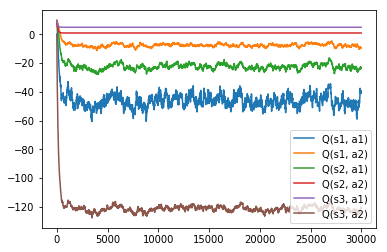

In [8]:
for s in range(result_q.shape[0]):
    for a in range(result_q[s].shape[0]):
        if S1[s][a] == None:
            continue
        plt.plot(np.arange(len(result_q[s][a]))*10+1, result_q[s][a],
                 label='Q(s{}, a{})'.format(s + 1, a + 1))
plt.legend(loc='lower right')
plt.show()

In [9]:
# 行動評価関数の収束値
Q

array([[ -40.2020972 ,   -9.33742243],
       [ -23.20774172,    1.        ],
       [   5.        , -121.06310959],
       [   0.        ,    0.        ]])

# 振り返り

* いくつか見た所、肌感覚と一致している。
* S_1でのa_1の行動評価関数の値が-49.5
    * 移動したS_3では、50%の確率でa_2(-100)を行うためその影響か。
* S_2でのa_1の行動評価関数の値が-22
    * 移動したS_1では、50%の確率でa_1を行いS_3に移動、さらにa_2を行うと上記同様-100の報酬を得るためか。
* S_2でのa_2の行動評価関数の値が1
* S_3でのa_1の行動評価関数の値が5